<a href="https://colab.research.google.com/github/lytyler/ST554_Homework4/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lanette Tyler   
ST554 Homework4

# HW3: Summarizing Data Numerically   
Copied and Pasted from HW3

## HW3 Task 1: Read in Student Data

In [ ]:
#import pandas module
import pandas as pd

In [4]:
student_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep = ";")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## HW3 Task 2: Summarize the Data

### Categorical Variables

##### One-Way Contingency Table

In [5]:
student_data.school.value_counts()

,count
school,
GP,349
MS,46


The preceeding table is a one-way contingency table of the school variable/column in the student_data dataset. The study is made up of observations of students in two different Portugese schools, represented by GP and MS. The count of 349 for the GP value indicates that 349 of the students observed were from that school. The students are disproportionately from this school, as can be seen compared to the value of 46 for MS, the other school in the study.

#### Two-Way Contingency Table

In [6]:
pd.crosstab(student_data["romantic"], student_data["famrel"], margins = True)

famrel,1,2,3,4,5,All
romantic,,,,,,
no,3,13,47,122,78,263
yes,5,5,21,73,28,132
All,8,18,68,195,106,395


The preceding two-way contingency table breaks down the student romantic relationship status (yes or no) by the family relationsip (famrel) quality (1 to 5, very bad to excellent). The number 78 in the table corresponds to romantic = no and famrel = 5, meaning 78 students have no romantic relationship and excellent family relationships.

#### Three-Way Contingency Table

In [7]:
pd.crosstab([student_data.sex, student_data.address], student_data.higher, margins = True,
            rownames = ["Sex", "Rural/Urban"],
            colnames = ["Higher Ed Interest"])

Higher Ed Interest  no  yes  All
Sex Rural/Urban                 
F   R                2   42   44
    U                2  162  164
M   R                4   40   44
    U               12  131  143
All                 20  375  395

In the preceding three-way continginecy table, the number 12 toward the table's bottom left indicates that 12 students in the study are males in urban areas not interested in higher education.

#### Conditional Contingency Tables (Two Ways)

Method 1 - Subset the data (for female only) and create a 2-way table (of mother's education level and student's higher education interest)



In [8]:
pd.crosstab(student_data.loc[student_data["sex"] == "F"].Medu,
            student_data.higher,
            rownames = ["Mother's Education Level"],
            colnames = [" Female Student Higher Education Interest"])

Female Student Higher Education Interest,no,yes
Mother's Education Level,,
0,1,1
1,0,32
2,2,58
3,1,52
4,0,61


Very few female students were uninterested in higher education, seemingly regarless of the mother's education level.

Method 2 - Create a 3-way table and subset it

In [9]:
#change sex variable to category type and rename categories as "Female" and
#"Male" for better table label
student_data["sex"] = student_data.sex.astype("category")
print(student_data.sex.cat.categories)
student_data["sex"] = student_data.sex.cat.rename_categories(["Female", "Male"])
student_data.sex.cat.categories

Index(['F', 'M'], dtype='object')


Index(['Female', 'Male'], dtype='object')

In [10]:
#create 3-way table
my_3way_table = pd.crosstab([student_data["higher"], student_data["Medu"]],
            student_data["sex"],
            rownames =  ["Student Higher Ed Interest", "Mother Ed Level"],
            colnames = ["Sex"],
            margins = True)

#print subsetted 3-way table (female only)
my_3way_table["Female"]

Student Higher Ed Interest  Mother Ed Level
no                          0                    1
                            1                    0
                            2                    2
                            3                    1
                            4                    0
yes                         0                    1
                            1                   32
                            2                   58
                            3                   52
                            4                   61
All                                            208
Name: Female, dtype: int64

### Numeric Variables

In [11]:
#take a look at the numeric variables
student_data[["age", "absences", "G1", "G2", "G3"]].head()

,age,absences,G1,G2,G3
0,18,6,5,6,6
1,17,4,5,5,6
2,15,10,7,8,10
3,15,2,15,14,15
4,16,4,6,10,10


#### Measures of center and spread for 3 numeric variables:

In [12]:
s_mean = student_data[["G1", "G2", "G3"]].mean()
s_median = student_data[["G1", "G2", "G3"]].median()
s_std = student_data[["G1", "G2", "G3"]].std()
s_df = pd.DataFrame(zip(s_mean, s_median, s_std), columns = ["mean", "median", "std"],
                    index = ["G1: first period grade", "G2: second period grade", "G3: third period grade"])
s_df



,mean,median,std
G1: first period grade,10.908861,11.0,3.319195
G2: second period grade,10.713924,11.0,3.761505
G3: third period grade,10.415190,11.0,4.581443


The mean test scores came down and spread increased over time. The median stayed the same.

#### Measures of center and spread for three numeric variables with data subsetted by a grouping variable:

In [13]:
print("Subset of students who are interested in higher ed:")
s_h_mean = student_data[student_data["higher"] == "yes"][["G1", "G2", "G3"]].mean()
s_h_median = student_data[student_data["higher"] == "yes"][["G1", "G2", "G3"]].median()
s_h_std = student_data[student_data["higher"] == "yes"][["G1", "G2", "G3"]].std()
s_h_df = pd.DataFrame(zip(s_h_mean, s_h_median, s_h_std), columns = ["mean", "median", "std"],
                    index = ["G1: first period grade", "G2: second period grade", "G3: third period grade"])
s_h_df

Subset of students who are interested in higher ed:


,mean,median,std
G1: first period grade,11.045333,11.0,3.285940
G2: second period grade,10.869333,11.0,3.722528
G3: third period grade,10.608000,11.0,4.493422


Means were a bit higher and spreads were a bit lower for stundents interested in higher education, but their scores decreased and spreads increased over time, as well. The mean stayed the same.

#### Measures of center and spread for three variables across a grouping variable:

In [14]:
summary = student_data.groupby("romantic").agg(mean_G3 = ("G3", "mean"), median_G3 = ("G3", "median"), std_G3 = ("G3", "std"),
                                     mean_age = ("age", "mean"), median_age = ("age", "median"), std_age = ("age", "std"),
                                     mean_absences = ("absences", "mean"), median_absences = ("absences", "median"),
                                     std_absences = ("absences", "std"))
summary.index.names = ["romantic relationship"] #make a better label
summary

,mean_G3,median_G3,std_G3,mean_age,median_age,std_age,mean_absences,median_absences,std_absences
romantic relationship,,,,,,,,,
no,10.836502,11.0,4.385946,16.547529,16.0,1.246607,4.840304,3.0,5.988951
yes,9.575758,11.0,4.856916,16.992424,17.0,1.287024,7.439394,4.0,10.787509


On average, students in romantic relationships scored lower on the final test by over a point, were about half a year older, and missed around 2 1/2 days more school than those not in romantic relationships.

#### Measures of center and spread for three numeric variables across two grouping variables:


In [15]:
#change family size variable to category type and assign clearer labels
student_data["famsize"] = student_data.famsize.astype("category")
print(student_data.famsize.cat.categories)
student_data["famsize"] = student_data.famsize.cat.rename_categories(["more than 3", "3 or less"])
student_data.famsize.cat.categories

Index(['GT3', 'LE3'], dtype='object')


Index(['more than 3', '3 or less'], dtype='object')

In [16]:
summary2 = student_data.groupby(["sex", "famsize"])[["G1", "G2", "G3"]].agg(["mean", "median","std"])
summary2

/tmp/ipython-input-1824169876.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary2 = student_data.groupby(["sex", "famsize"])[["G1", "G2", "G3"]].agg(["mean", "median","std"])


G1                          G2                   \
                         mean median       std       mean median       std   
sex    famsize                                                               
Female more than 3  10.397436   10.0  3.200160  10.044872   10.0  3.786807   
       3 or less    11.288462   11.0  3.268006  11.423077   11.0  2.966123   
Male   more than 3  11.208000   11.0  3.389490  11.112000   11.0  3.898337   
       3 or less    11.274194   11.0  3.426844  11.000000   11.0  3.836836   

                           G3                   
                         mean median       std  
sex    famsize                                  
Female more than 3   9.628205   10.0  4.739971  
       3 or less    10.980769   11.0  4.127813  
Male   more than 3  10.864000   11.0  4.586699  
       3 or less    11.016129   11.0  4.340023

Female students with family size greater than three scored noticeably lower on all tests than the other groups.

#### Correlation matrix for all numeric values

In [17]:
#sub_titanic_data[["age", "fare", "sibsp", "parch"]].corr()

student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


There was strong correlation between test scores for 1st, 2nd, and 3rd periods, but not age and absences.

# HW4 Summarizing Student Data Graphically   
(Student Data Summary from HW3, continued)

In [70]:
#import modules
import numpy as np
import pandas as pd
import matplotlib as plt

## Task 1: Graphical Summaries of Categorical and Numeric Variables

### Categorical Variables

#### Stacked Bar Graph

In [19]:
#add variable for category type of romantic column, rename categories for better labels
student_data["romanticC"] = student_data.romantic.astype("category")
student_data["romanticC"] = student_data.romanticC.cat.rename_categories(["No Romantic Relationship", "Romantic Relationship"])

In [20]:
#add variable for category type of famrel column
student_data["famrelC"] = student_data.famrel.astype("category")
student_data.famrelC.cat.categories

Index([1, 2, 3, 4, 5], dtype='int64')

[Text(0.5, 0, 'Quality of Family Relationships \n Very Bad (1) to Excellent (5)'),
 Text(0, 0.5, 'Number of Students')]

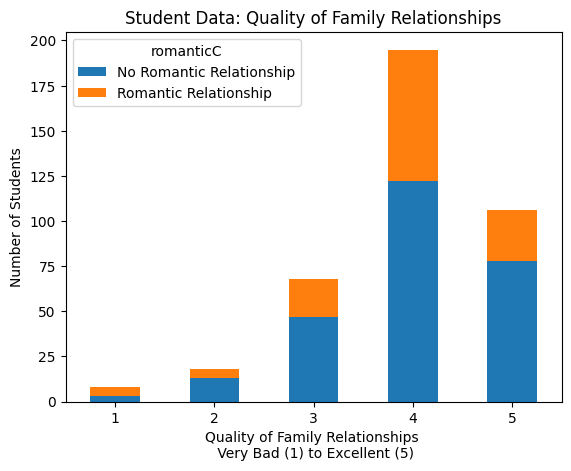

In [21]:
table1 = pd.crosstab(student_data["famrel"], student_data["romanticC"])
table1.plot.bar(stacked = True, rot = 0,
                title =
                "Student Data: Quality of Family Relationships") \
                .set(xlabel = "Quality of Family Relationships \n Very Bad (1) to Excellent (5)",
                     ylabel = "Number of Students")

The greatest number of students have family relationship quality rating 4, just one level lower than than the highest rating of ecellent. The next most frequent rating is 5, or excellent. The least common ranking was 1, or very bad family relationship quality, followed by 2, just one level above very bad. In all family ranking groups except for "very bad," more students did not have a romantic realtionship than did.

#### Side-by-Side Bar Graph

In [37]:
student_data.higherC.cat.categories

Index(['No Higer Ed Interest', 'Higher Ed Interest'], dtype='object')

In [39]:
#add category variable types for address and higher columns
student_data["addressC"] = student_data.address.astype("category")
student_data["addressC"] = student_data.addressC.cat.rename_categories(["Rural", "Urban"])
student_data["higherC"] = student_data.higher.astype("category")
student_data["higherC"] = student_data.higherC.cat.rename_categories(["No Higher Ed Interest", "Higher Ed Interest"])

[Text(0.5, 0, 'Higher Education Interest Status'),
 Text(0, 0.5, 'Number of Students')]

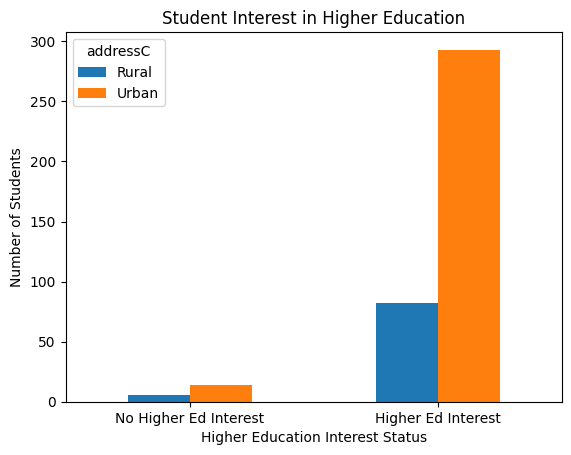

In [45]:
table2 = pd.crosstab(student_data.higherC, student_data.addressC)
table2.plot.bar(rot = 0, title = "Student Interest in Higher Education") \
    .set(xlabel = "Higher Education Interest Status",
         ylabel = "Number of Students")

Many more students are interested in higher educaiton than are not (in both rural and urban areas), and many more students live in urban areas than in rural areas. The proportion of students not interested in higher education is higher in rural areas.

### Numeric Variables (and across groups)

#### G3: Final Math Score Across RUral and Urban Home Locations

In [61]:
#prepare for overlaid histograms
#create separate series for categories of categorical variable
#determine bins to set
G3_rural = student_data.loc[student_data.addressC == "Rural", "G3"]
G3_urban = student_data.loc[student_data.addressC == "Urban", "G3"]
no_bins = 10
bins = [i*max(student_data.G3)/no_bins for i in range(0, no_bins + 1)]

[Text(0.5, 0, 'G3: Final Math Scores')]

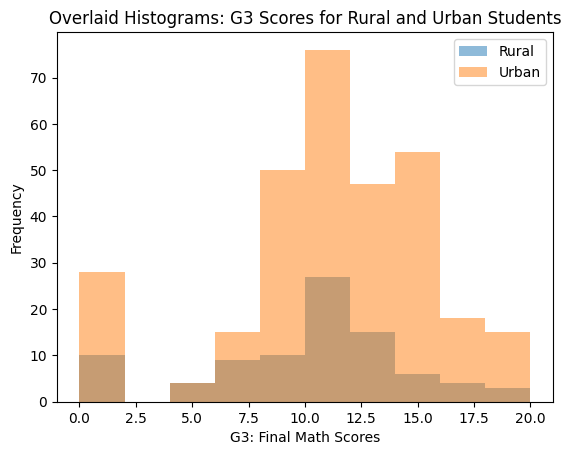

In [77]:
#Create overlaid histograms of G3 for rural and urban students
G3_rural.plot(kind = "hist",alpha = 0.5, bins = bins, label = "Rural",
                   title = "Overlaid Histograms: G3 Scores for Rural and Urban Students",
              legend = True)
G3_urban.plot(kind = "hist", alpha = 0.5, bins = bins, label = "Urban",
              legend = True) \
    .set(xlabel = "G3: Final Math Scores")

The range of values and centers of final math scores seem very similar in the overlaid histogram, with perhaps a but higher center for urban students. There are more urban than rural students.

[Text(0.5, 0, 'G3: Final Math Scores')]

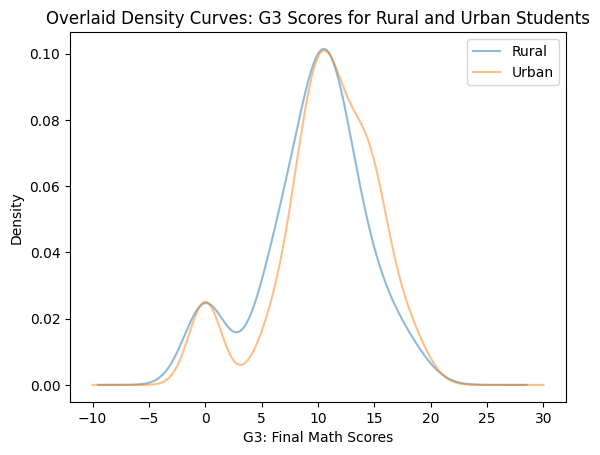

In [78]:
#Create overlaid density curves for urban vs. rural G3 scores
G3_rural.plot(kind = "density", alpha = 0.5, label = "Rural",
                   title = "Overlaid Density Curves: G3 Scores for Rural and Urban Students",
              legend = True)
G3_urban.plot(kind = "density", alpha = 0.5, label = "Urban",
              legend = True) \
    .set(xlabel = "G3: Final Math Scores")

The overlaid density curve shows great overlap between the urban and rural scores.

[Text(0.5, 0, 'Home Location Type'), Text(0, 0.5, 'Student G3 Score')]

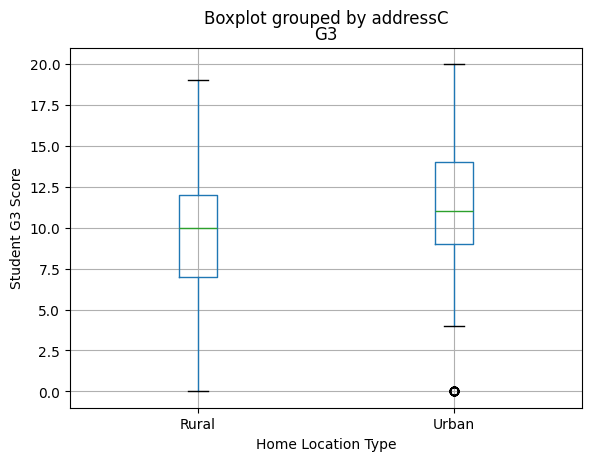

In [89]:
#Create grouped boxplots of G3 scores for urban vs. rural students
student_data.boxplot(column = "G3", by = "addressC") \
    .set(xlabel = "Home Location Type",
         ylabel = "Student G3 Score")

The grouped boxplot shows overlapping ranges, like the histograms and density curves above, but make the higher center of the urabn scores more clear.

#### Age Across Family Relationship Quality

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    object  
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     395 non-null    object  
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    object  
 6   Medu        395 non-null    int64   
 7   Fedu        395 non-null    int64   
 8   Mjob        395 non-null    object  
 9   Fjob        395 non-null    object  
 10  reason      395 non-null    object  
 11  guardian    395 non-null    object  
 12  traveltime  395 non-null    int64   
 13  studytime   395 non-null    int64   
 14  failures    395 non-null    int64   
 15  schoolsup   395 non-null    object  
 16  famsup      395 non-null    object  
 17  paid        395 non-null    object  
 18  activities  395 non-null    object  
 19  nursery 